In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
import numpy as np
import math

<h1><center>Group 1 ASMT-08</center></h1>

<h3>Company Summary</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [3]:
url = 'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=2b1b51cb6cacd2a75465fb1f00658932f347374e'

response = requests.get(url)

data = json.loads(response.text)

companysummary = pd.DataFrame.from_dict(data)

newcolumns = companysummary.iloc[0]

# Remove the first row from the DataFrame
companysummary = companysummary.iloc[1:]

# Rename the columns using the `rename()` method
companysummary.rename(columns=newcolumns, inplace=True)

companysummary.reset_index(inplace = True, drop = True)

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
0,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,6.0,None,16.2,None,6.7,None,10.7,None,1


<h3>Characteristics of Business</h3>
<h6>________________________________________________________________________________________________________________________</h6>

<h3>Characteristics of Business Owners</h3>
<h6>________________________________________________________________________________________________________________________</h6>

In [3]:
url3 = 'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*&QDESC_LABEL=YRACQBUS&key=&key=1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
response3 = requests.get(url3)
data3 = json.loads(response3.text)
charbizowner = pd.DataFrame.from_dict(data3)
# Make the first row the column names
charbizowner.columns = charbizowner.iloc[0]
# Remove the first row from the dataframe
charbizowner = charbizowner.drop(0, axis = 0)
# Reset Index
charbizowner.reset_index(inplace = True)
# Drop index column
charbizowner = charbizowner.drop('index', axis = 1)

In [4]:
# Make the numeric values integer or float
charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)

In [5]:
# Put the column names into lower case so don't have to worry about using upper case
charbizowner.columns = charbizowner.columns.str.lower()

In [6]:
# Renamed columns with clearer names since original were vague 
charbizowner.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners'
}, inplace = True)

In [7]:
# Removed flagged values 
charbizowner = charbizowner[(charbizowner['ownpdemp_pct_f'] != 'X') & (charbizowner['ownpdemp_pct_f'] != 'D')]

In [8]:
# Removed the 'Total for all sectors' so I could focus on each industry 
charbizowner = charbizowner[charbizowner['naics2017_label'] != 'Total for all sectors']

In [9]:
# Filtered data to get the total number of owners per industry
industry_totals = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting')]
# Sorted the values so the bar graph could be in descending order
industry_totals = industry_totals.sort_values('number_owners', ascending = False)

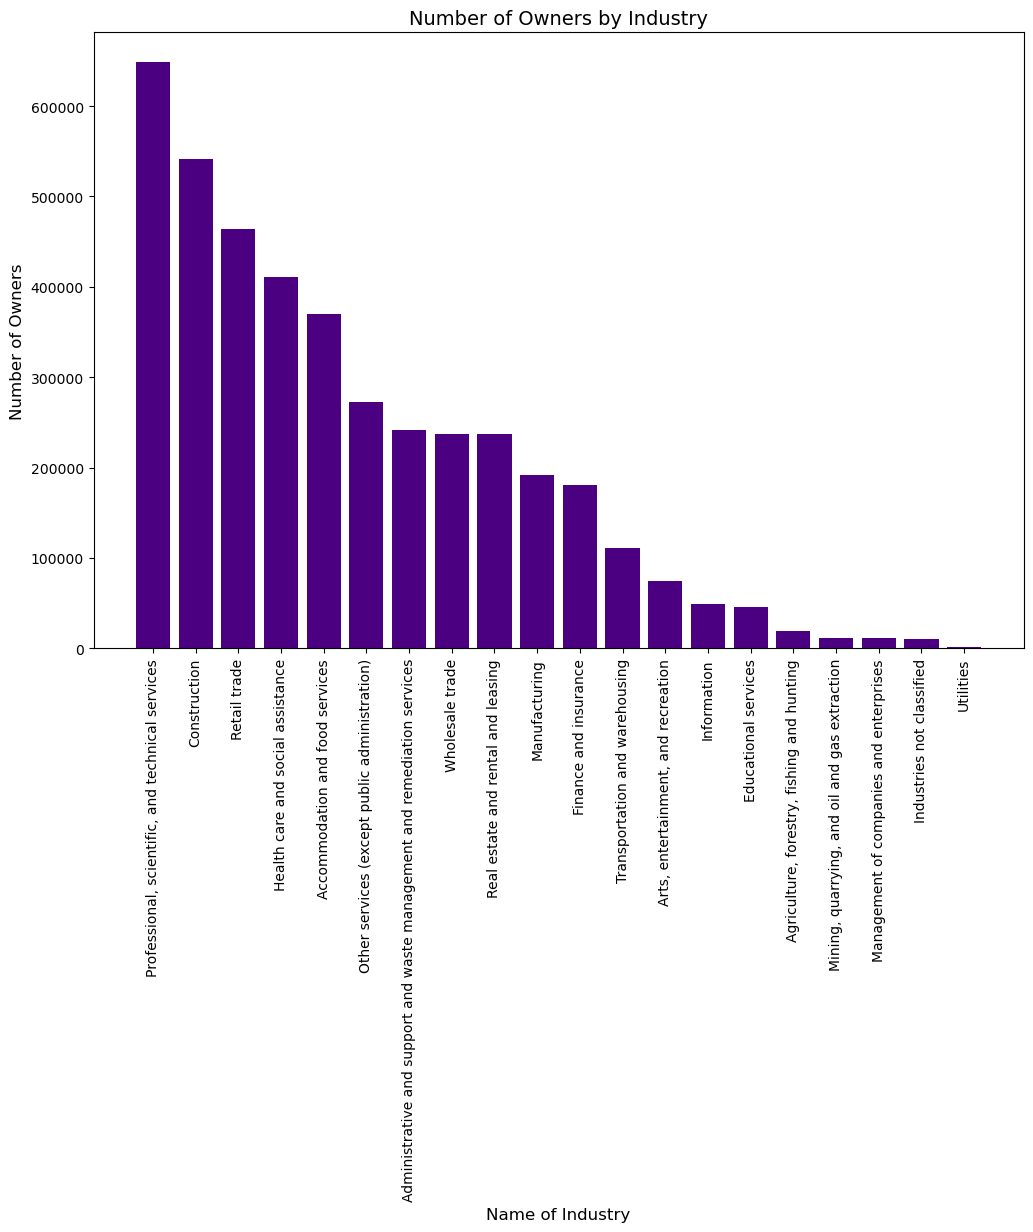

In [18]:
plt.figure(figsize = (12, 8))
plt.bar(x=industry_totals['naics2017_label'], height = industry_totals['number_owners'], color = 'indigo')
plt.xticks(rotation = 90)

plt.title('Number of Owners by Industry', size = 14)
plt.xlabel('Name of Industry', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [10]:
# Filtered data to get the total number of male vs female owners
male_vs_female = charbizowner[(charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_sex_label'] == 'Female') | (charbizowner['owner_sex_label'] == 'Male'))]

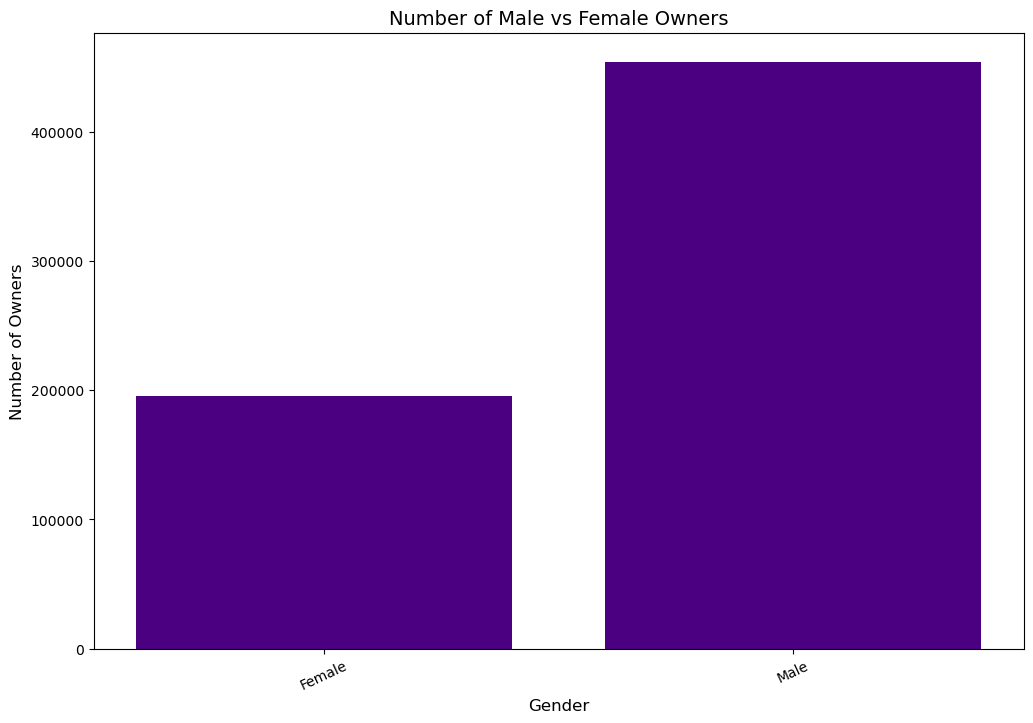

In [17]:
plt.figure(figsize = (12, 8))
plt.bar(x=male_vs_female['owner_sex_label'], height = male_vs_female['number_owners'], color = 'indigo')
plt.xticks(rotation = 25)

plt.title('Number of Male vs Female Owners', size = 14)
plt.xlabel('Gender', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [11]:
# Filtered data to get the total number of minority vs nonminority owners
minority_vs_nonminorty = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_race_label'] == 'Minority') | (charbizowner['owner_race_label'] == 'Nonminority'))]

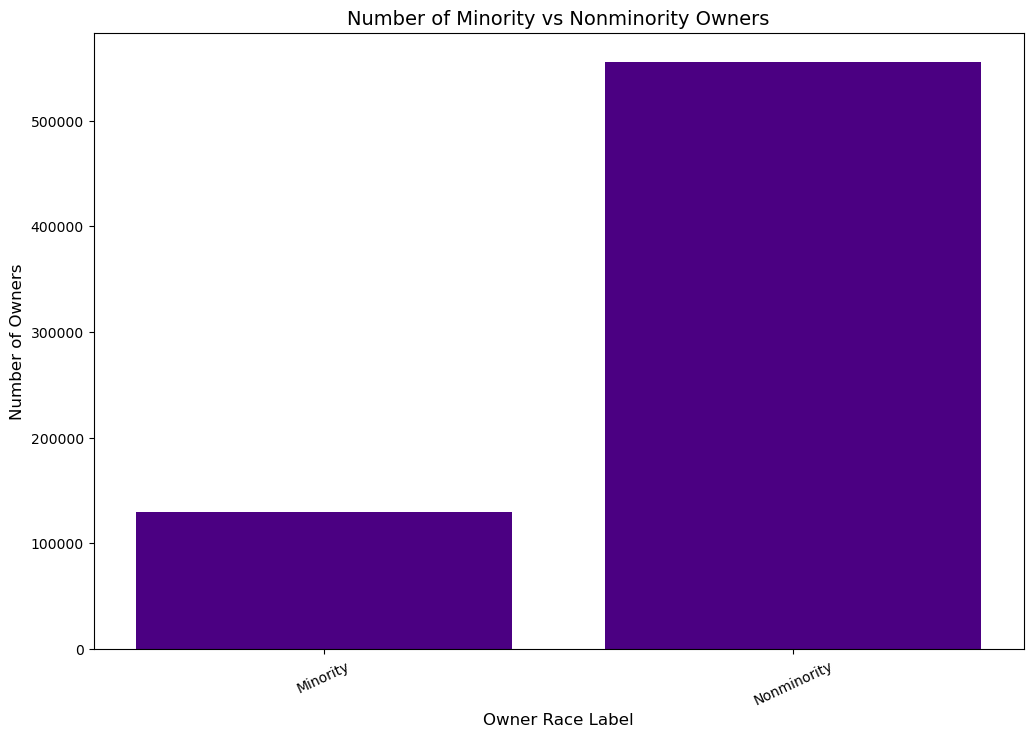

In [16]:
plt.figure(figsize = (12, 8))
plt.bar(x=minority_vs_nonminorty['owner_race_label'], height = minority_vs_nonminorty['number_owners'], color = 'indigo')
plt.xticks(rotation = 25)

plt.title('Number of Minority vs Nonminority Owners', size = 14)
plt.xlabel('Owner Race Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [12]:
# Filtered data to get the total number of owners by race
races = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_eth_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & (charbizowner['owner_race_label'] != 'Minority') & (charbizowner['owner_race_label'] != 'Nonminority') & (charbizowner['owner_race_label'] != 'All owners of respondent firms')]
# Sorted the values so the bar graph could be in descending order
races = races.sort_values('number_owners', ascending = False)

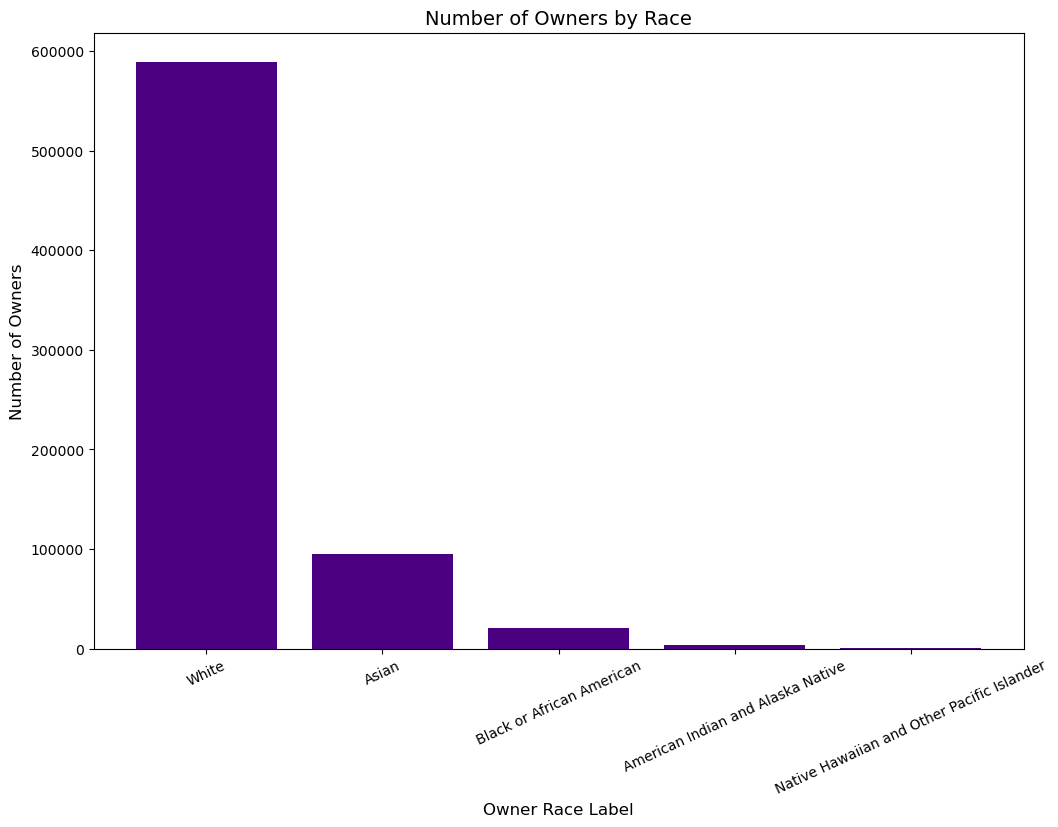

In [15]:
plt.figure(figsize = (12, 8))
plt.bar(x=races['owner_race_label'], height = races['number_owners'], color = 'indigo')
plt.xticks(rotation = 25)

plt.title('Number of Owners by Race', size = 14)
plt.xlabel('Owner Race Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [13]:
# Filtered data to get the total number of Hispanic vs Non-Hispanic owners
hispanic_vs_nonhispanic = charbizowner[(charbizowner['owner_sex_label'] == 'All owners of respondent firms') & (charbizowner['owner_race_label'] == 'All owners of respondent firms') & (charbizowner['owner_vet_label'] == 'All owners of respondent firms') & (charbizowner['ownchar_label'] == 'Total reporting') & ((charbizowner['owner_eth_label'] == 'Hispanic') | (charbizowner['owner_eth_label'] == 'Non-Hispanic'))]

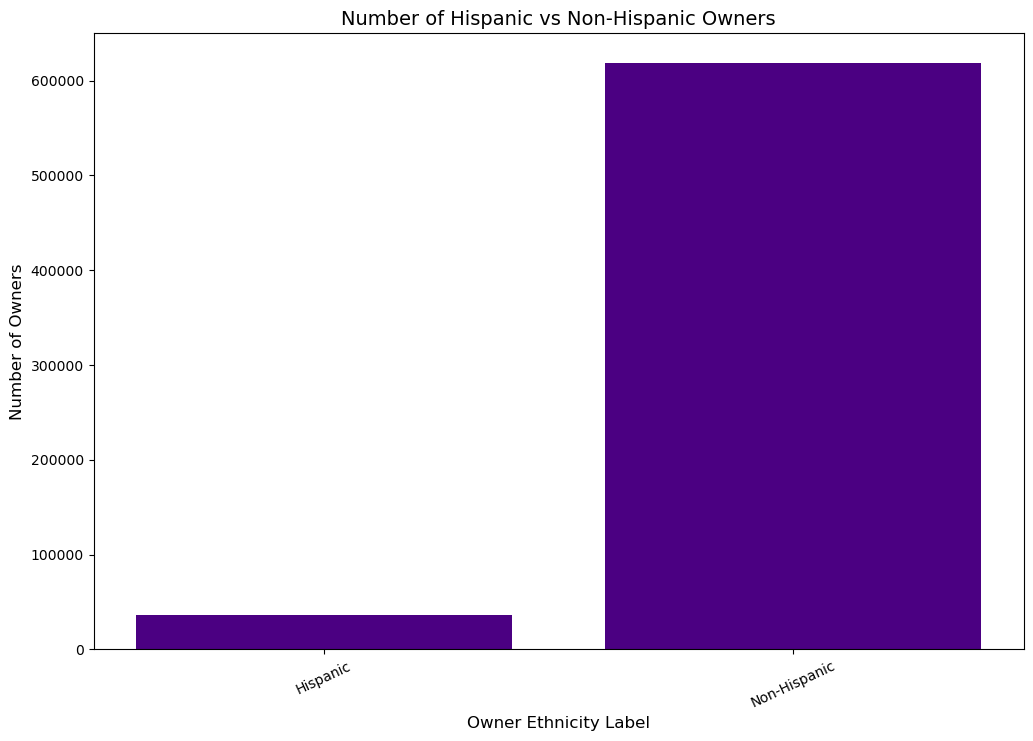

In [14]:
plt.figure(figsize = (12, 8))
plt.bar(x=hispanic_vs_nonhispanic['owner_eth_label'], height = hispanic_vs_nonhispanic['number_owners'], color = 'indigo')
plt.xticks(rotation = 25)

plt.title('Number of Hispanic vs Non-Hispanic Owners', size = 14)
plt.xlabel('Owner Ethnicity Label', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [19]:
# Request to get data by state

API_KEY = '1cbf5e86c7037dce27fe5bb28774b53fc7855e90'
BASE_URL = 'https://api.census.gov/data/'

queries_business_owners = [
    "GEO_ID","NAME","OWNER_SEX","OWNER_SEX_LABEL","QDESC","QDESC_LABEL","OWNCHAR","OWNCHAR_LABEL","YEAR","OWNPDEMP","OWNPDEMP_F","OWNPDEMP_PCT","OWNPDEMP_PCT_F","OWNPDEMP_S","OWNPDEMP_S_F","OWNPDEMP_PCT_S","OWNPDEMP_PCT_S_F"
]
charbizowner_state = requests.get(BASE_URL + '2018/abscbo?get='+ ','.join(queries_business_owners) +'&for=state:*&key=' + API_KEY).json()

charbizowner_state = pd.DataFrame(charbizowner_state[1:], columns=charbizowner_state[0])


In [20]:
# Same steps as above

charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']]=charbizowner_state[['OWNPDEMP_PCT_S','OWNPDEMP_S','OWNPDEMP_PCT','OWNPDEMP','YEAR']].apply(pd.to_numeric)
charbizowner_state.columns = charbizowner_state.columns.str.lower()
charbizowner_state.rename(columns = {
    'ownpdemp': 'number_owners',
    'ownpdemp_pct': 'percent_numb_owners',
    'ownpdemp_s': 'se_numb_owners',
    'ownpdemp_pct_s': 'se_percent_numb_owners'
}, inplace = True)
charbizowner_state = charbizowner_state[(charbizowner_state['ownpdemp_pct_f'] != 'X') & (charbizowner_state['ownpdemp_pct_f'] != 'D')]

In [21]:
# Filtered to focus on the data pertaining to education and to exclude total reporting
charbizowner_state_educ = charbizowner_state[(charbizowner_state['qdesc_label'] == 'EDUC') & (charbizowner_state['ownchar_label'] != 'Total reporting')]

In [22]:
# Grouped by education (bachelor's, master's, high school/GED) to get the mean value across all states 
result = charbizowner_state_educ.groupby(['ownchar_label'])['number_owners'].mean().reset_index().sort_values('number_owners', ascending = False)

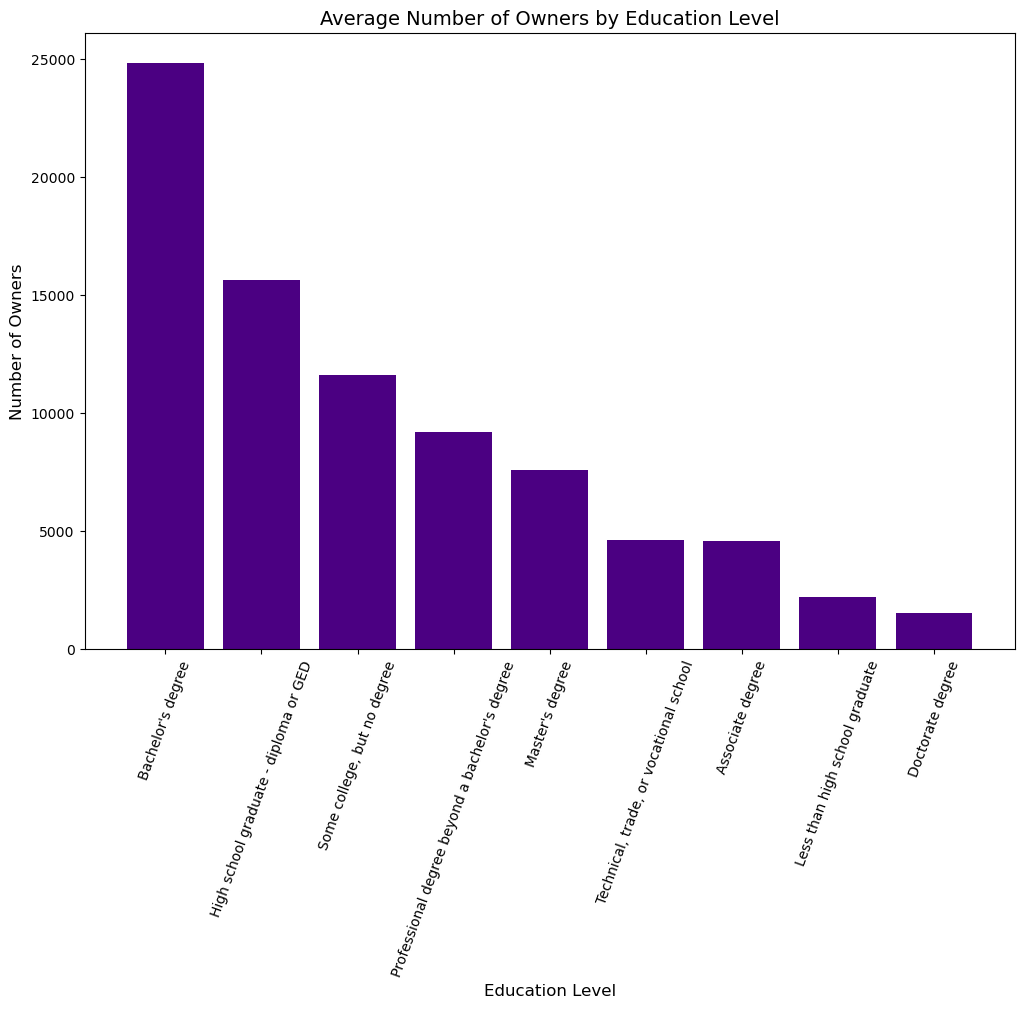

In [28]:
plt.figure(figsize = (12, 8))
plt.bar(x=result['ownchar_label'], height = result['number_owners'], color = 'indigo')
plt.xticks(rotation = 70)

plt.title('Average Number of Owners by Education Level', size = 14)
plt.xlabel('Education Level', size = 12)
plt.ylabel('Number of Owners', size = 12);

In [24]:
# Focused on Bachelor's since business owners were more likely to have that degree
bachelors = charbizowner_state_educ[(charbizowner_state_educ['ownchar_label'] == "Bachelor's degree")]
# Sorted values so that the columns would be in descending order 
bachelors = bachelors.sort_values('number_owners', ascending = False)

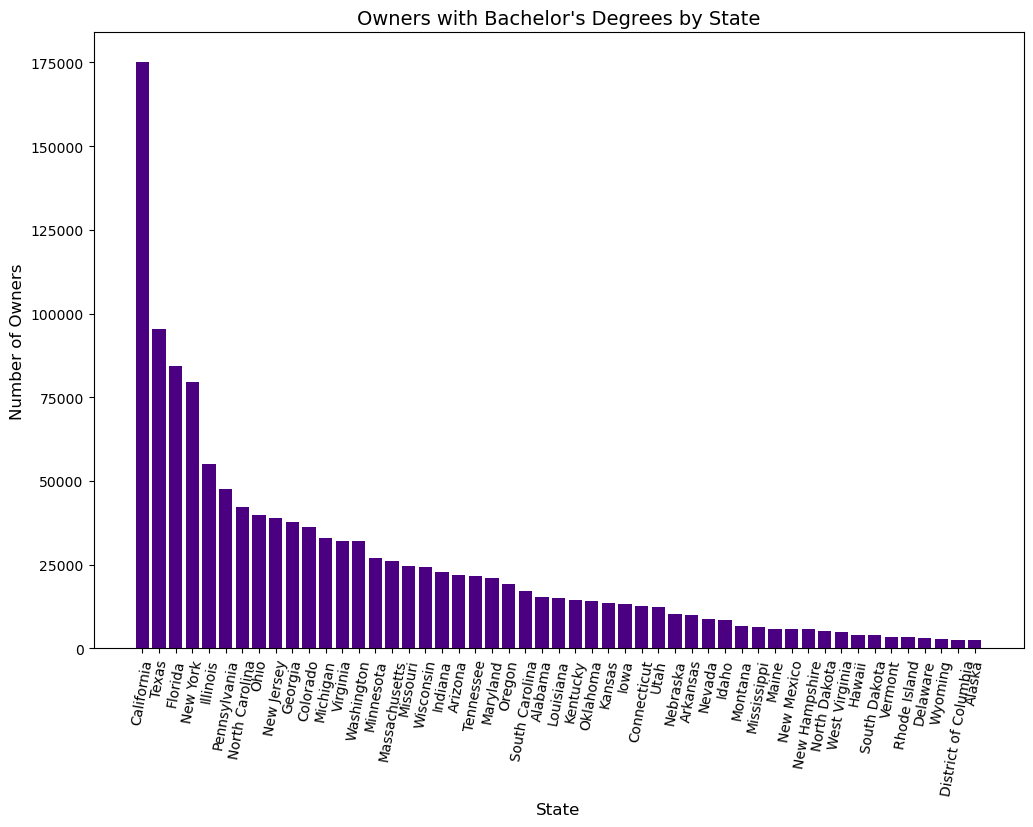

In [26]:
plt.figure(figsize = (12, 8))
plt.bar(x=bachelors['name'], height = bachelors['number_owners'], color = 'indigo')
plt.xticks(rotation = 80)

plt.title("Owners with Bachelor's Degrees by State", size = 14)
plt.xlabel('State', size = 12)
plt.ylabel('Number of Owners', size = 12);

<h3>Technology Characteristics of Businesses</h3>
<h6>________________________________________________________________________________________________________________________</h6>